# Diamonds_XGboost_CV_AllKnown_BalancedData
By Vivian Zeng       01/05/2021

In [58]:
#pip install xgboost

In [59]:
#pip install --upgrade xgboost

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [3]:
ls

20201216.Rmd
20201216金刚石数据库.xlsx
20201217_warpup.docx
20201217_warpup.pdf
Construct Covariance Matrix-Standardization.ipynb
Construct Covariance Matrix.ipynb
Diamind9000MissingIDs_XZ_20201216.csv
Diamind_XZ_20201215_AllKnown.csv
Diamind_XZ_20201216_Unknown.csv
Diamonds_XGboost_CV_AllKnown_20201216.ipynb
Diamonds_XGboost_CV_AllKnown_20210103_BalanceData.ipynb
diamond20201216.csv


In [4]:
df_raw = pd.read_csv("Diamind_XZ_20201215_AllKnown.csv")
df_raw.head()

,Unnamed: 0,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace,NAs
0,1,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN,48
1,2,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN,48
2,3,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN,48
3,4,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN,48
4,5,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN,48


### Data Preprocessing

In [5]:
#df_raw['Method（主量）'].unique()

In [6]:
#df_raw['Comment（Inclusion/Sulfide）'].unique()

In [7]:
df = df_raw.copy()
df.shape

(2144, 43)

In [8]:
df.columns #Keep NA to see NA's impact

Index(['Unnamed: 0', 'craton', 'Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca',
       'Sr', 'Ba', 'Na', 'P', 'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace',
       'Co_trace', 'Ni_trace', 'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace',
       'Ba_trace', 'La_trace', 'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace',
       'Dy_trace', 'Er_trace', 'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace',
       'Ca_trace', 'Mn_trace', 'Mg_trace', 'NAs'],
      dtype='object')

In [9]:
df.drop(df.columns[df.isna().mean() == 1], axis=1, inplace=True)  # Remove columns that 100% missing 
df.shape

(2144, 43)

In [10]:
#df.drop(['Unnamed: 0', 'ID', 'DOI', 'Reference', 'location', 'location comment', 'location',  'GPS Location',
        # 'Diamond_Method', 'Inclusion_Method', 'sample', 'mineral（Diamond/Inclusion/Sulfide）', 
       # 'Method（主量）', 'Comment（Inclusion/Sulfide）'], 
       # axis = 1, inplace=True)
#df.shape

In [11]:
df=df.drop(df.columns[0], axis=1)

In [12]:
df=df.drop('NAs', axis=1)

In [13]:
df.head()

,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN
1,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN
2,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN
3,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN
4,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN


In [14]:
df.craton.value_counts()

Siberia                 695
Kaapvaal                410
Slave                   330
Amazonia                207
Congo                   101
West Africa              98
Superior                 86
Guyana                   57
Alluvial                 38
Wyoming                  35
Zimbabwe                 28
Gawler                   17
Tarim                    12
East European            10
Pohorje                  10
Buffalo Head Terrane      6
Kalahari                  4
Name: craton, dtype: int64

In [15]:
df.craton.nunique()

17

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

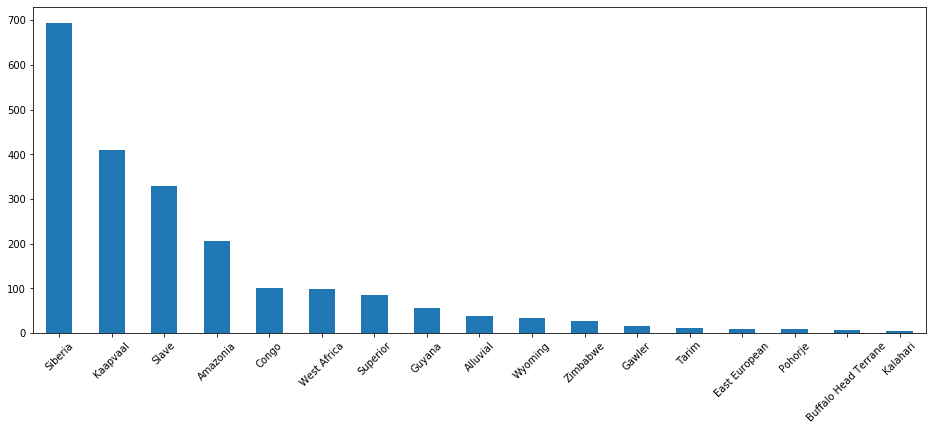

In [16]:
plt.figure(figsize=(16, 6))
df.craton.value_counts().plot(kind = 'bar')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

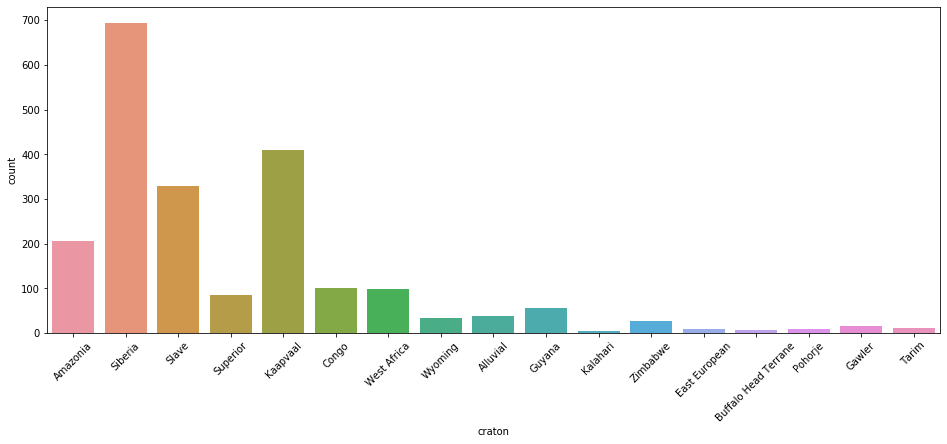

In [17]:
plt.figure(figsize=(16, 6))
sns.countplot(df.craton)
plt.xticks(rotation=45)

In [18]:
#df.craton = le.fit_transform(df.craton.astype(str))
df.craton=df.craton.astype('category')

In [19]:
df.craton.nunique()
df.craton.value_counts()

Siberia                 695
Kaapvaal                410
Slave                   330
Amazonia                207
Congo                   101
West Africa              98
Superior                 86
Guyana                   57
Alluvial                 38
Wyoming                  35
Zimbabwe                 28
Gawler                   17
Tarim                    12
East European            10
Pohorje                  10
Buffalo Head Terrane      6
Kalahari                  4
Name: craton, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 41 columns):
craton      2144 non-null category
Si          1978 non-null float64
Ti          1978 non-null float64
Al          1978 non-null float64
Cr          1978 non-null float64
V           1800 non-null float64
Mn          1971 non-null float64
Mg          1977 non-null float64
Ca          1978 non-null float64
Sr          1785 non-null float64
Ba          1792 non-null float64
Na          1970 non-null float64
P           1915 non-null float64
K           1976 non-null float64
Fe          1978 non-null float64
Co          1785 non-null float64
Ni          1939 non-null float64
S           1785 non-null float64
Zn          1785 non-null float64
Cr_trace    679 non-null float64
Co_trace    653 non-null float64
Ni_trace    686 non-null float64
Sr_trace    441 non-null float64
Y_trace     315 non-null float64
Zr_trace    366 non-null float64
Nb_trace    339 non-null float64
Ba_trace    385

### Split data into craton and elements

In [21]:
cratons = df.craton.values
cratons=cratons.astype('str')
cratons

array(['Amazonia', 'Amazonia', 'Amazonia', ..., 'Siberia', 'Siberia',
       'Siberia'], dtype='<U20')

In [22]:
le = LabelEncoder()
cratons = le.fit_transform(cratons)
cratons

array([ 1,  1,  1, ..., 10, 10, 10])

In [23]:
features = df.drop(['craton'], axis=1)
features.shape

(2144, 40)

In [24]:
features.head()

,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN
1,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN
2,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN
3,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN
4,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN


In [25]:
features.columns

Index(['Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca', 'Sr', 'Ba', 'Na', 'P',
       'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace', 'Co_trace', 'Ni_trace',
       'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace', 'Ba_trace', 'La_trace',
       'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace', 'Dy_trace', 'Er_trace',
       'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace', 'Ca_trace', 'Mn_trace',
       'Mg_trace'],
      dtype='object')

In [26]:
def plot_importance(feature_df, model, n_feature):
    '''
    Input:
        feature_df: The feature dataframe / The X_train with column names
        model: The training model
        n_feature: number of feature importance you want to display
    Output:
        A plot with the top n feature importance in decreasing order
    '''
    vals = model.feature_importances_
    df = pd.DataFrame(vals, index=feature_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
    df_n = df.iloc[:n_feature,]
    plt.figure(figsize=(16, 9))
    plt.bar(df_n.index, df_n.Importance)
    plt.xticks(rotation=45)

In [27]:
def print_results(y_true, y_pred, dataset):
    print(dataset,'-- R2: {0}, Accuracy Score: {1}'.format(r2_score(y_true, y_pred), 
                                                              accuracy_score(y_true, y_pred)))

### Split into training set and test set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, cratons, test_size=0.2, 
                                                    stratify = cratons, random_state = 2020)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1715, 40), (429, 40), (1715,), (429,))

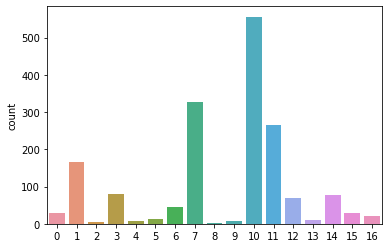

In [29]:
sns.countplot(y_train)

In [30]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(df['craton']),
                                             df['craton']))

w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]

In [ ]:
#from sklearn.utils.class_weight import compute_sample_weight
# xgb_classifier.fit(X, y, sample_weight=compute_sample_weight("balanced", y))

### XGBoost

In [132]:
xg = XGBClassifier(random_state=2020)
xg.fit(X_train, y_train)
y_train_preds = xg.predict(X_train)
y_test_preds = xg.predict(X_test)

training -- R2: 0.9981400734484814, Accuracy Score: 0.9970845481049563
test -- R2: 0.8791114555651726, Accuracy Score: 0.9463869463869464


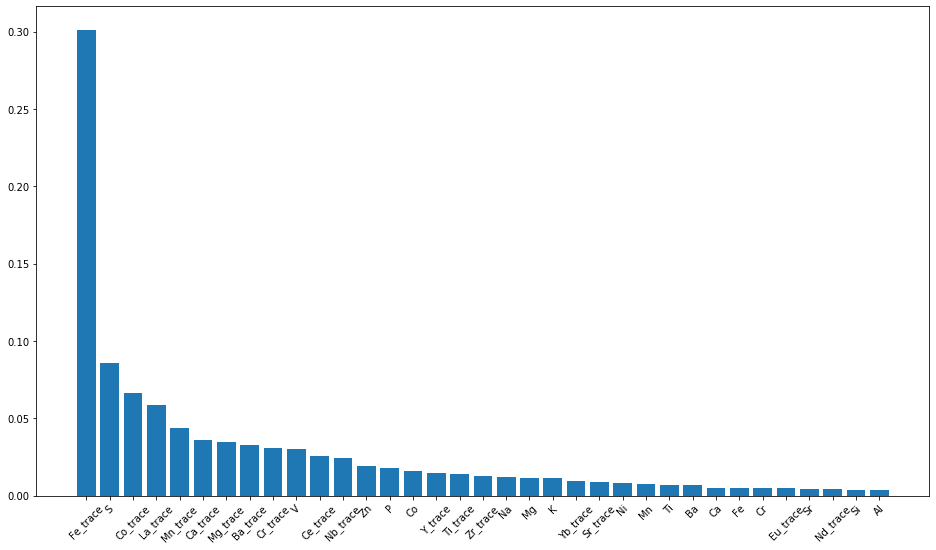

In [135]:
print_results(y_train, y_train_preds, 'training')
print_results(y_test, y_test_preds, 'test')
plot_importance(features, xg, 35)

In [94]:
# xgb = XGBClassifier(subsample=0.5, colsample_bytree=0.1, objective='multi:softmax', num_class = 9, 
#                     eval_metric = 'merror', seed=2020)

In [40]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 17, 
                    eval_metric = 'merror', seed=2020, sample_weight=w_array)
xgb.fit(X_train, y_train)
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

#May not work since got the same scores

[21:09:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [41]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 0.9981400734484814, Accuracy Score: 0.9970845481049563


In [42]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.8791114555651726, Accuracy Score: 0.9463869463869464


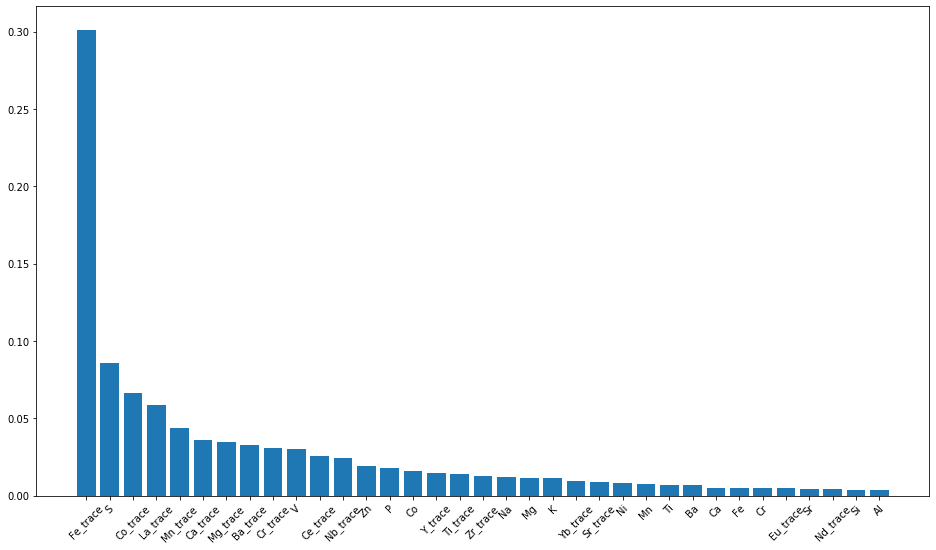

In [43]:
plot_importance(features, xgb, 35)

### Model Optimization

In [44]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 1]
depth = [3, 4, 5, 6, 7]
min_split = [1, 2, 3, 4, 5]

In [45]:
# scorings = {'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [65]:
# scorings = {'accuracy': make_scorer(accuracy_score), 
#            'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [46]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 17, 
                    eval_metric = 'merror', tree_method='hist', sample_weight=w_array, seed=2020)

In [47]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth}, 
                      cv=5, scoring='accuracy')
xgb_cv.fit(X_train, y_train)

[21:09:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:09:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:09:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:10:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:10:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:10:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:11:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:11:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:11:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:12:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:12:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:12:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:13:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:13:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:14:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:15:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:15:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:16:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:16:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:16:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:16:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:16:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:17:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:17:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:17:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:18:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:18:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:18:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:19:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:19:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:19:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:20:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:20:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:20:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:20:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:20:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:20:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:21:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:21:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:21:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:22:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:22:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:22:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:23:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:23:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:23:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:23:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:23:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:24:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:24:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:24:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:24:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:25:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:25:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:25:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:26:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:26:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:26:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:27:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:27:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:27:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:27:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:27:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:27:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:28:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:28:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:28:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:28:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:28:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:28:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:29:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:29:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:29:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:30:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:30:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:30:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

[21:30:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:30:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:30:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_...
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None,
                                     sample_weight=array

In [48]:
xgb_cv.best_params_

{'eta': 0.05, 'gamma': 1, 'max_depth': 7}

In [49]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0500000007,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=17, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              sample_weight=array([12.61176471, 12.61176471, 12.61176471, ...,  0.18146424,
        2.2125903 ,  2.2125903 ]),
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist', ...)

In [50]:
xgb_cv.best_score_

0.9061224489795918

In [51]:
xgb_best = xgb_cv.best_estimator_

In [52]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [53]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 0.9701998434745582, Accuracy Score: 0.9813411078717201


In [54]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.7812259944843406, Accuracy Score: 0.916083916083916


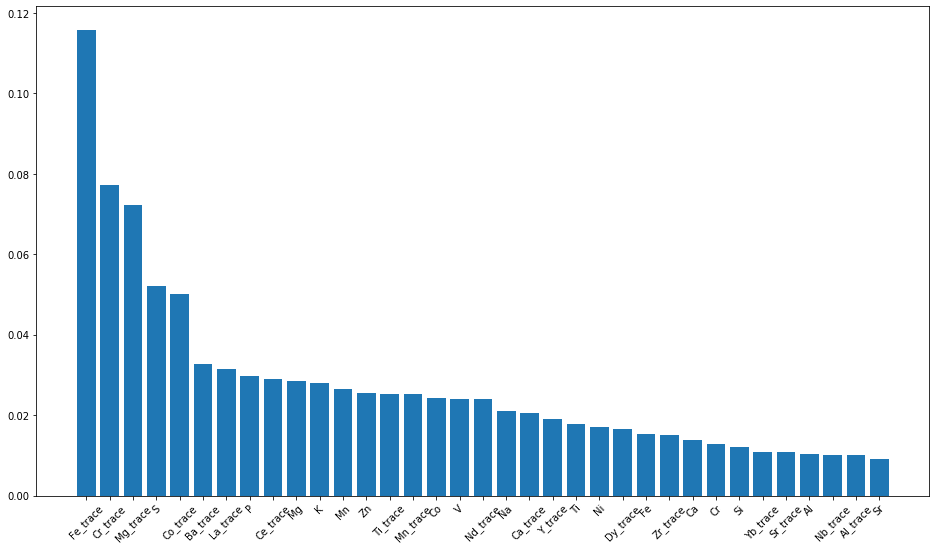

In [55]:
plot_importance(features, xgb_best, 35)

### ============ Save the best model ==================================

In [57]:
xgb_best = XGBClassifier(objective='multi:softmax', num_class = 17, 
                    eval_metric = 'merror', tree_method='hist', 
                    eta = 0.05, gamma = 1, max_depth = 7, seed=2020, sample_weight=w_array)
xgb_best.fit(X_train, y_train)

[21:34:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { sample_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0500000007,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=17, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              sample_weight=array([12.61176471, 12.61176471, 12.61176471, ...,  0.18146424,
        2.2125903 ,  2.2125903 ]),
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist', ...)

In [58]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [59]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 0.9701998434745582, Accuracy Score: 0.9813411078717201


In [60]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.7812259944843406, Accuracy Score: 0.916083916083916


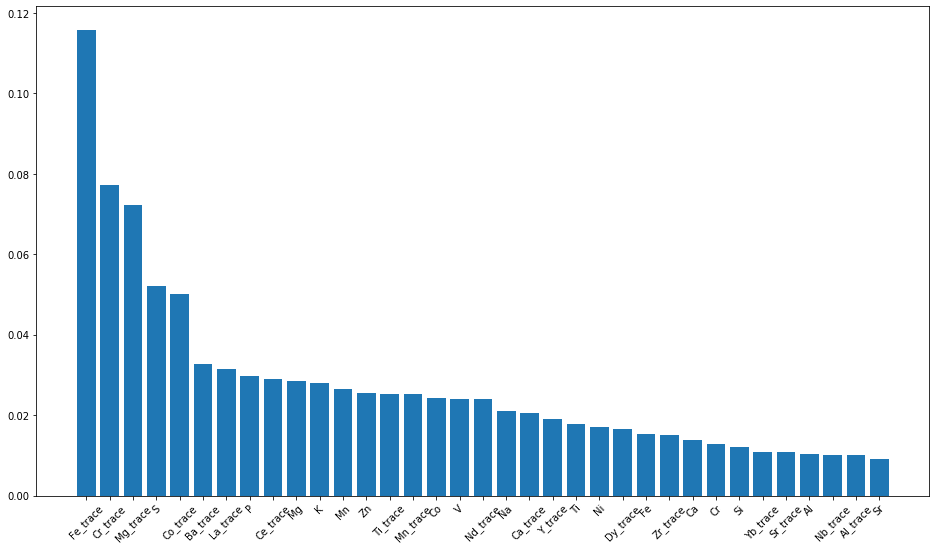

In [61]:
#training -- R2: 0.9701998434745582, Accuracy Score: 0.9813411078717201
#test -- R2: 0.7812259944843406, Accuracy Score: 0.916083916083916
plot_importance(features, xgb_best, 35)

In [62]:
# with open('diamonds_xgb_gridsearchbest.pkl', 'wb') as f:
#     pickle.dump(xgb_best, f)

In [63]:
#pip install shap

In [64]:
import shap

In [65]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_train)

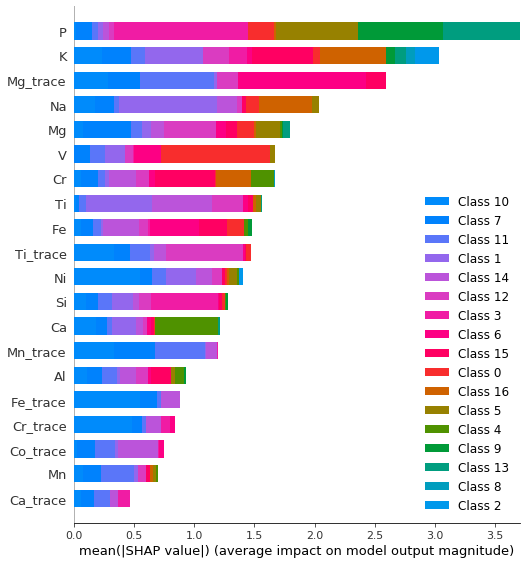

In [66]:
# take the mean absolute value of the SHAP values for 
# each feature to get a standard bar plot (produces stacked bars for multi-class outputs)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Sampling

In [67]:
from imblearn.over_sampling import RandomOverSampler #
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
pd.options.display.max_columns = None # display all columns

In [68]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=2020)

In [69]:
# fit and apply the transform
X_o_train, y_o_train = oversample.fit_resample(X_train, y_train)

In [70]:
# fit and apply the transform
X_o_train, y_o_train = oversample.fit_resample(X_o_train, y_o_train)

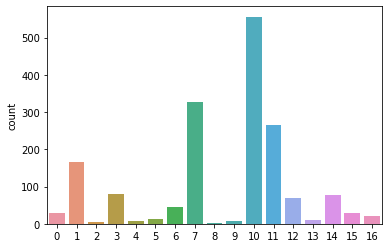

In [71]:
sns.countplot(y_train)

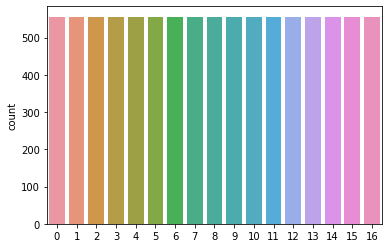

In [119]:
sns.countplot(y_o_train)

In [120]:
# fit and apply the transform 
## X 10 times
X_o_train, y_o_train = oversample.fit_resample(X_o_train, y_o_train)


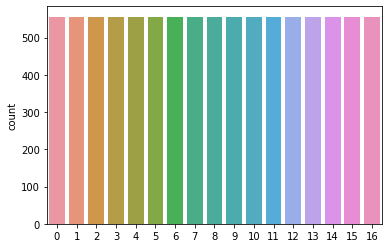

In [114]:
sns.countplot(y_o_train)

In [122]:
balance=pd.merge(pd.DataFrame(y_o_train), pd.DataFrame(X_o_train), left_index=True, right_index=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

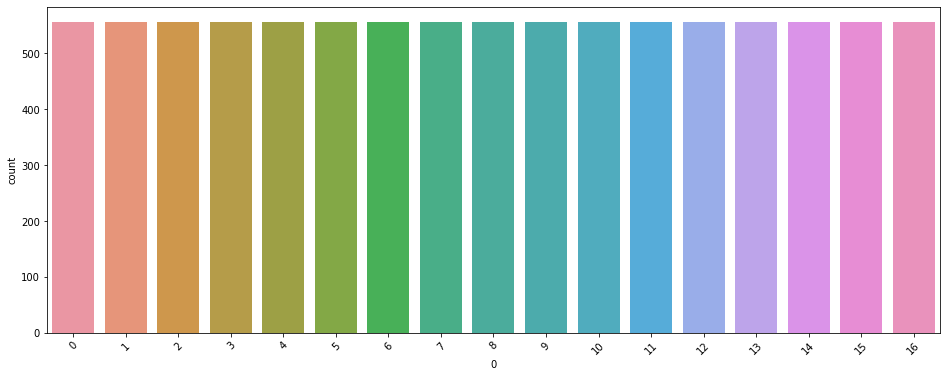

In [123]:
plt.figure(figsize=(16, 6))
sns.countplot(balance.iloc[:, 0])
plt.xticks(rotation=45)

In [137]:
xg_bala = XGBClassifier(random_state=2020)
xg_bala.fit(X_o_train, y_o_train)
y_train_preds = xg_bala.predict(X_o_train)
y_test_preds = xg_bala.predict(X_test)

training -- R2: 0.9984923825645367, Accuracy Score: 0.9959796868387643
test -- R2: 0.8512140991571354, Accuracy Score: 0.9487179487179487


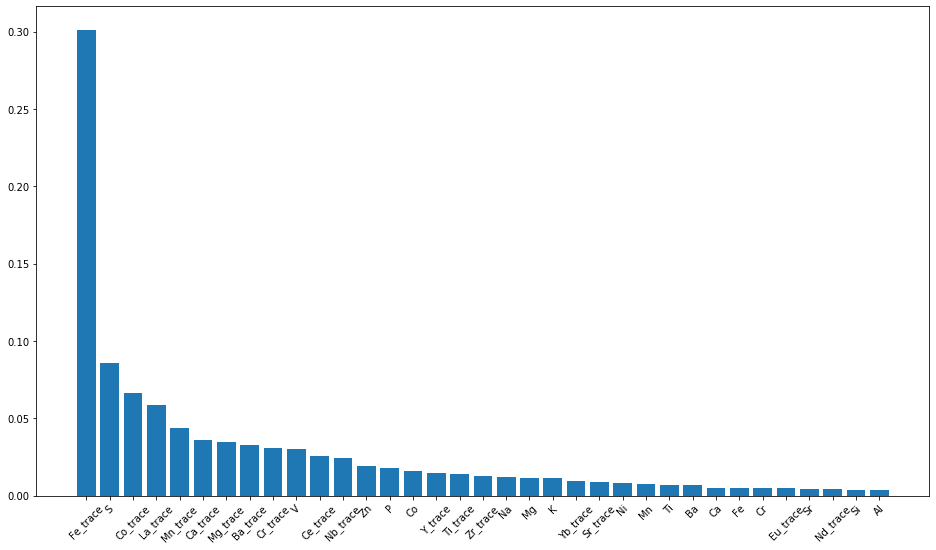

In [138]:
print_results(y_o_train, y_train_preds, 'training')
print_results(y_test, y_test_preds, 'test')
plot_importance(features, xg, 35)
#base model training -- R2: 0.9981400734484814, Accuracy Score: 0.9970845481049563
#base model test -- R2: 0.8791114555651726, Accuracy Score: 0.9463869463869464

In [139]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 17, 
                    eval_metric = 'merror', tree_method='hist', seed=2020)

In [140]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth}, 
                      cv=5, scoring='accuracy')
xgb_cv.fit(X_o_train, y_o_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_class=17, num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
          

In [143]:
xgb_cv.best_params_

{'eta': 0.1, 'gamma': 1, 'max_depth': 7}

In [144]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=17, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [145]:
xgb_cv.best_score_

0.9894208993309999

In [146]:
xgb_best = xgb_cv.best_estimator_

In [147]:
y_train_preds = xgb_best.predict(X_o_train)
y_test_preds = xgb_best.predict(X_test)

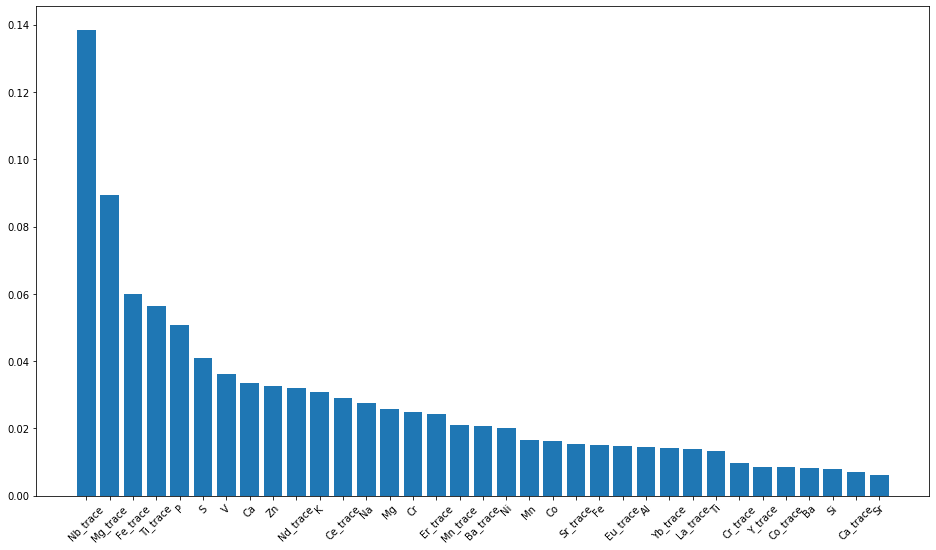

In [148]:
plot_importance(features, xgb_best, 35)

In [150]:
print_results(y_o_train, y_train_preds, 'training')
print_results(y_test, y_test_preds, 'test')
#training -- R2: 0.9701998434745582, Accuracy Score: 0.9813411078717201
#test -- R2: 0.7812259944843406, Accuracy Score: 0.916083916083916

training -- R2: 0.998179397658344, Accuracy Score: 0.9954506982649175
test -- R2: 0.8280478733680052, Accuracy Score: 0.9370629370629371


In [153]:
xgb_best = XGBClassifier(objective='multi:softmax', num_class = 17, 
                    eval_metric = 'merror', tree_method='hist', 
                    eta = 0.1, gamma = 1, max_depth = 7, seed=2020)
xgb_best.fit(X_o_train, y_o_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=17, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [155]:
y_train_preds = xgb_best.predict(X_o_train)
y_test_preds = xgb_best.predict(X_test)
print_results(y_o_train, y_train_preds, 'training')
print_results(y_test, y_test_preds, 'test')
#training before resample-- R2: 0.9701998434745582, Accuracy Score: 0.9813411078717201
#test after resample -- R2: 0.7812259944843406, Accuracy Score: 0.916083916083916

training -- R2: 0.998179397658344, Accuracy Score: 0.9954506982649175
test -- R2: 0.8280478733680052, Accuracy Score: 0.9370629370629371


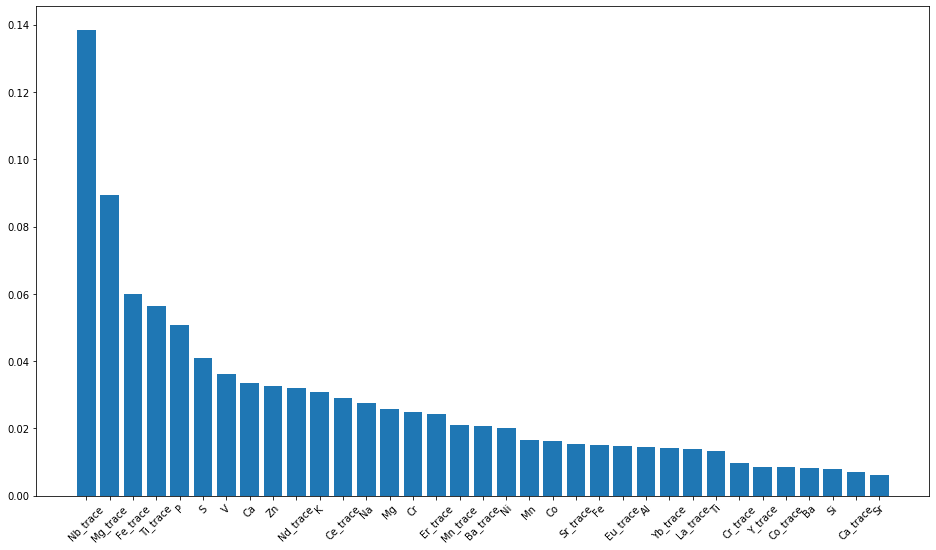

In [156]:
plot_importance(features, xgb_best, 35)

In [151]:
#sm = SMOTE(random_state=2020, sampling_strategy=0.1)
#X_res, y_res = sm.fit_sample(X_train, y_train)

In [80]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTEENN

In [171]:
# Over-sampling 
#smote = SMOTE(random_state=2020)
#smote_enn = make_pipeline(SimpleImputer(), SMOTEENN(smote=smote))
#X_res, y_res = smote_enn.fit_resample(X_train, y_train)